# Data Cleaning and Analysis Script for CSCI526 ChestNut Game Entropy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

file_name = 'ChestNut_Data_10-24.csv'

line = '\n=======================================================================================\n'

In [2]:
df = pd.read_csv(file_name)

In [3]:
df.drop(columns=['Timestamp'], inplace=True)
df = df.tail(-1940)

In [4]:
display(df)

,Player ID,Tag,Time
1940,638016042300280,lv1-start,638016159711990
1941,638016042300280,lv1-item-bluecube,638016159799390
1942,638016042300280,lv1-item-bluecube,638016159799550
1943,638016042300280,lv1-logo,638016159879560
1944,638016042300280,lv1-logo,638016159954730
...,...,...,...
18317,638022842217920,lv1-start,638022844442250
18318,638022842217920,lv1-item-bluecube,638022844518620
18319,638022842217920,lv1-item-bluecube,638022844526070
18320,638022842217920,lv1-logo,638022844615020


In [5]:
gb = df.groupby('Player ID')    
player_list = [gb.get_group(x) for x in gb.groups]

In [6]:
start_list = ['lv0-start', 'lv1-start', 'lv2-start', 'lv3-start', 'lv4-start']
end_list = ['lv0-success', 'lv1-success', 'lv2-success', 'lv3-success', 'lv4-success',
            'lv0-death', 'lv1-death', 'lv2-death', 'lv3-death', 'lv4-death',
            'lv0-quit', 'lv1-quit', 'lv2-quit', 'lv3-quit', 'lv4-quit']
pause_list = ['lv0-pause', 'lv1-pause', 'lv2-pause', 'lv3-pause', 'lv4-pause']
resume_list = ['lv0-resume', 'lv1-resume', 'lv2-resume', 'lv3-resume', 'lv4-resume']
player_game_list = []

for player_df in player_list: 
    #display(player_df)

    #print(player_game_list)
    player_df = player_df.sort_values(['Time'], ascending=True)
    game_list = []
    started = -1
    seq_list = []
    for index, row in player_df.iterrows():
        if row['Tag'] in start_list:
            if started == -1:
                started = start_list.index(row['Tag'])
                seq_list.append([row['Tag'], row['Time']])
            else:
                started = start_list.index(row['Tag'])
                seq_list = []
                seq_list.append([row['Tag'], row['Time']])
        elif row['Tag'] in end_list:
            if started != -1:
                seq_list.append([row['Tag'], row['Time']])
                game_list.append(seq_list)
                seq_list = []
                started = -1
        elif started != -1:
                seq_list.append([row['Tag'], row['Time']])
        #display(row['Tag'])
    player_game_list.append([player_df.iloc[0]['Player ID'],game_list])

In [7]:
level_name = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4']

print(line)
print('Total Player numbers: %d'%(len(player_game_list)))
for item in player_game_list:
    print(line)
    print('Player ID: %d'%(item[0]))
    for game in item[1]:
        print('\nPlayed Level %d'%(start_list.index(game[0][0])))
        for cp in game:
            print('%s '%(cp[0]), end='')
        print('\nGame Time: %f'%((game[len(game)-1][1] - game[0][1])/10000))
            



Total Player numbers: 216


Player ID: 638008528272180

Played Level 0
lv0-start lv0-logo lv0-item-redcube lv0-settings lv0-quit 
Game Time: 5.498000

Played Level 0
lv0-start lv0-logo lv0-item-redcube lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-settings lv0-quit 
Game Time: 17.380000

Played Level 0
lv0-start lv0-logo lv0-item-redcube lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-logo lv0-logo lv0-success 
Game Time: 26.258000

Played Level 3
lv3-start lv3-item-redcube lv3-item-redcube lv3-cp-1 lv3-item-key lv3-death 
Game Time: 47.407000

Played Level 0
lv0-start lv0-item-redcube lv0-logo lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-settings lv0-quit 
Game Time: 439.140000

Played Level 1
lv1-start lv1-item-bluecube lv1-logo lv1-item-redcube lv1-item-redcube lv1-item-redcube lv1-item-bluecube lv1-item-bluecube lv1-death 
Game Time: 77.526000

Played Level 1
lv1-start

lv3-start lv3-logo lv3-item-redcube lv3-item-redcube lv3-cp-1 lv3-logo lv3-logo lv3-item-redcube lv3-item-bluecube lv3-item-bluecube lv3-item-redcube lv3-item-key lv3-item-redcube lv3-cp-4 lv3-item-key lv3-logo lv3-cp-5 lv3-cp-6 lv3-item-bluecube lv3-item-bluecube lv3-item-bluecube lv3-item-bluecube lv3-logo lv3-cp-9 lv3-cp-11 lv3-logo lv3-item-key lv3-item-key lv3-item-key lv3-logo lv3-item-key lv3-item-key lv3-item-key lv3-cp-10 lv3-item-key lv3-item-redcube lv3-logo lv3-success 
Game Time: 321.722000

Played Level 4
lv4-start lv4-cp-0 lv4-item-redcube lv4-item-redcube lv4-cp-1 lv4-item-bluecube lv4-item-bluecube lv4-cp-2 lv4-cp-4 lv4-item-key lv4-cp-8 lv4-success 
Game Time: 66.851000

Played Level 0
lv0-start lv0-settings lv0-resume lv0-logo lv0-item-redcube lv0-item-redcube lv0-item-bluecube lv0-item-bluecube lv0-item-bluecube lv0-logo lv0-settings lv0-quit 
Game Time: 180.901000

Played Level 0
lv0-start lv0-settings lv0-resume lv0-logo lv0-item-redcube lv0-settings lv0-quit 
Gam

lv4-start lv4-cp-0 lv4-item-redcube lv4-item-redcube lv4-cp-1 lv4-logo lv4-item-bluecube lv4-item-bluecube lv4-cp-2 lv4-cp-3 lv4-logo lv4-cp-5 lv4-cp-4 lv4-cp-8 lv4-logo lv4-cp-4 lv4-death 
Game Time: 172.964300

Played Level 2
lv2-start lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-logo lv2-item-key lv2-item-bluecube lv2-cp-2 lv2-item-redcube lv2-item-redcube lv2-item-key lv2-logo lv2-item-key lv2-item-bluecube lv2-item-bluecube lv2-success 
Game Time: 90.937000

Played Level 1
lv1-start lv1-item-bluecube lv1-logo lv1-logo lv1-logo lv1-item-redcube lv1-item-redcube lv1-item-redcube lv1-item-key lv1-item-bluecube lv1-item-bluecube lv1-item-bluecube lv1-logo lv1-logo lv1-logo lv1-success 
Game Time: 82.973300

Played Level 1
lv1-start lv1-item-bluecube lv1-logo lv1-logo lv1-logo lv1-item-redcube lv1-item-redcube lv1-item-redcube lv1-item-bluecube lv1-item-key lv1-item-bluecube lv1-item-bluecube lv1-logo lv1-logo lv1-logo lv1-success 
Game Time:

lv2-start lv2-item-redcube lv2-item-redcube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-key lv2-item-key lv2-logo lv2-item-key lv2-item-bluecube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-item-redcube lv2-cp-0 lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-item-bluecube lv2-logo lv2-cp-1 lv2-logo lv2-logo lv2-cp-4 lv2-item-bluecube lv2-item-bluecube lv2-death 
Game Time: 164.956000

Played Level 2
lv2-start lv2-item-redcube lv2-item-redcube lv2-item-bluecube lv2-settings lv2-quit 
Game Time: 90.063000

Played Level 2
lv2-start lv2-logo lv2-item-redcube lv2-item-redcube lv2-item-key lv2-item-redcube lv2-item-redcube lv2-cp-2 lv2-item-key lv2-logo lv2-death 
Game Time: 52.234000

Played Level 2
lv2-start lv2-settings lv2-resume lv2-settings lv2-quit 
Game Time: 31.933000

Played Level 2
lv2-start lv2-settin

In [8]:
sorted_data = [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]
#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for item in player_game_list:
    #print(line)
    #print('Player ID: %d'%(item[0]))
    for game in item[1]:
        pause_time = 0
        pause_start = 0
        pause = False
        for cp in game:
            if cp[0] in pause_list:
                pause_start = cp[1] 
                pause = True
            elif pause and (cp[0] in resume_list or cp[0] in end_list):
                pause_time += cp[1] - pause_start
                pause = False
                
        game_time = ((game[len(game)-1][1] - game[0][1]) - pause_time)/10000
        level = start_list.index(game[0][0])
        ending = int(end_list.index(game[len(game)-1][0]) / 5)
        #print(game_time)
        #print(pause_time)
        #print('level %d, ending %d'%(level,ending))
        sorted_data[level][ending].append([game, game_time])

In [9]:
level_labels = ['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump']
def game_stat_painter(labels, sub_labels, data, title, unit, sub_color = None, x_rotation = 0, label_format = '%d'):
    label_size = 12
    font_size = 18
    title_size = 22
    bar_count = len(data[0])
    
    if bar_count != len(sub_labels):
        print('Wrong Input Size!')
        return 
    
    bar_width = 0.7 / bar_count
    
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(15, 10))
    for i in range(bar_count):
        single_bar_data = [data_list[i] for data_list in data]
        offset = -0.35 + i*bar_width + (bar_width/2)
        if sub_color != None:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i], color = sub_color[i])
        else:
            rects = ax.bar(x+offset , single_bar_data, bar_width, label=sub_labels[i])
        if x_rotation != 0:    
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size, rotation='vertical') 
        else:
            ax.bar_label(rects, fmt = label_format, padding=3, fontsize = label_size)
            
    ax.set_ylabel(unit, fontsize = font_size)
    ax.set_title(title, fontsize = title_size)
    if x_rotation != 0:
        ax.set_xticks(x, ha="right", rotation = x_rotation, rotation_mode="anchor")
        plt.xticks(rotation=x_rotation)
    else:
        ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='both', labelsize=font_size)
    plt.margins(y=0.2)
    ax.legend(fontsize = font_size)
    #fig.tight_layout()
    plt.show()

In [10]:
def pie_plot(labels, data, title, explode = None, colors = None):
    if len(labels) != len(data):
        print('Size mismatch!')
        return
    if explode == None:
        explode = [0.0 for l in labels]

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = labels,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp)

    # Adding legend
    ax.legend(wedges, labels,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 12)
    ax.set_title(title)

    # show plot
    plt.show()

In [11]:
avg_play_time = []
for i in range(5):
    avg_play_time.append([0,0,0])
    
#succes:[], #died:[], #quit:[]

for lv in range(5):
    for i in range(3):
        sum = 0
        counter = 0
        for item in sorted_data[lv][i]:
            counter += 1
            sum += item[1]
        if counter == 0:
            avg_time = 0
        else:
            avg_time = sum / counter
        avg_play_time[lv][i] = avg_time
        print('Average level game time for %d level%d is %fS'%(i, lv, avg_time))
print(avg_play_time)

Average level game time for 0 level0 is 60.670428S
Average level game time for 1 level0 is 0.000000S
Average level game time for 2 level0 is 43.439147S
Average level game time for 0 level1 is 109.413942S
Average level game time for 1 level1 is 98.139931S
Average level game time for 2 level1 is 63.171783S
Average level game time for 0 level2 is 107.530298S
Average level game time for 1 level2 is 105.207961S
Average level game time for 2 level2 is 66.275500S
Average level game time for 0 level3 is 320.282425S
Average level game time for 1 level3 is 124.249814S
Average level game time for 2 level3 is 66.779010S
Average level game time for 0 level4 is 85.201285S
Average level game time for 1 level4 is 64.902737S
Average level game time for 2 level4 is 69.087040S
[[60.67042845188286, 0, 43.43914666666667], [109.41394239130437, 98.13993124999996, 63.17178307692308], [107.53029750000003, 105.20796126126129, 66.2755], [320.28242500000005, 124.24981384615388, 66.77900975609758], [85.20128500000

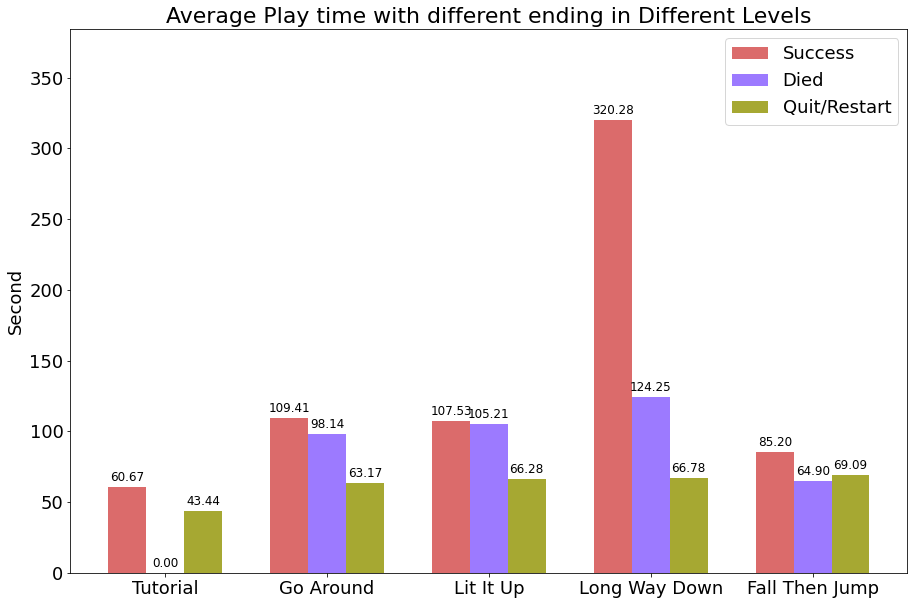

In [12]:
game_stat_painter(level_labels, ['Success', 'Died', 'Quit/Restart'], 
                    avg_play_time, 'Average Play time with different ending in Different Levels', 'Second', 
                  sub_color=['#db6b6b', '#9c7aff', '#a6a832'], label_format= '%.2f')

In [13]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[1]:
        counter += 1
        sum += item[1]
    if counter == 0:
            avg_time = 0
    else:
        avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 0.000000S
Average level game time for level1 is 98.139931S
Average level game time for level2 is 105.207961S
Average level game time for level3 is 124.249814S
Average level game time for level4 is 64.902737S


In [14]:
for level in sorted_data:
    sum = 0
    counter = 0
    for item in level[2]:
        counter += 1
        sum += item[1]
    if counter == 0:
            avg_time = 0
    else:
        avg_time = sum / counter
    print('Average level game time for level%d is %fS'%(sorted_data.index(level), avg_time))

Average level game time for level0 is 43.439147S
Average level game time for level1 is 63.171783S
Average level game time for level2 is 66.275500S
Average level game time for level3 is 66.779010S
Average level game time for level4 is 69.087040S


## Collected Items

In [15]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
item_count = []


for i in range(5):
    item_count.append([0,0,0,0])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'redcube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][0] += 1
                elif 'bluecube' in check_pts[0]:
                    item_count[int(check_pts[0][2])][1] += 1
                elif 'key' in check_pts[0]:
                    item_count[int(check_pts[0][2])][2] += 1
                elif 'logo' in check_pts[0]:
                    item_count[int(check_pts[0][2])][3] += 1
                    
print(item_count )

[[586, 830, 0, 955], [820, 882, 129, 975], [755, 750, 254, 238], [387, 374, 283, 286], [201, 146, 43, 86]]


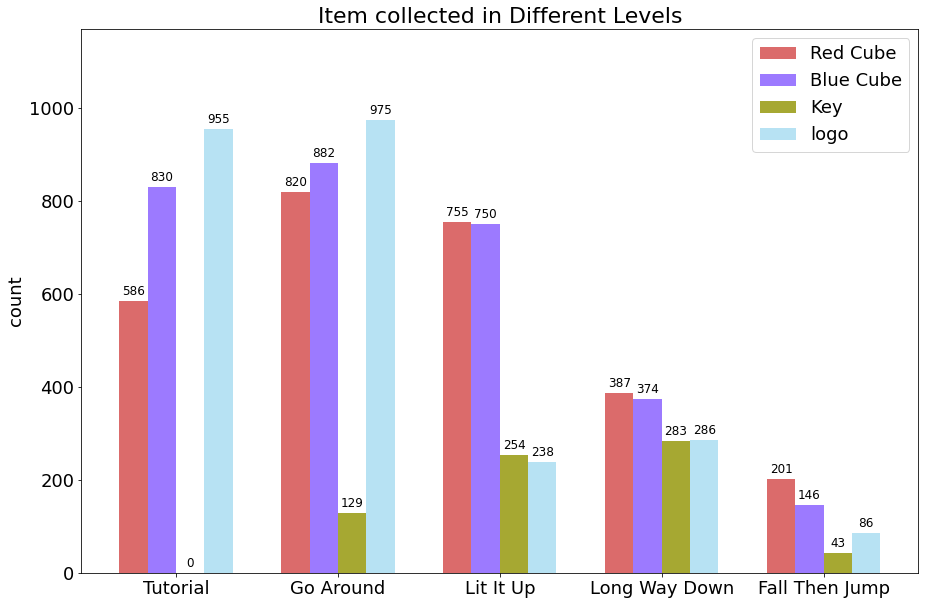

In [16]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key', 'logo'], 
                  item_count, 'Item collected in Different Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832', '#b7e2f3'])

In [17]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
succ_item_count = []

#sorted_data schema: [#level:[ #succes:[], #died:[], #quit:[] ] ]

for i in range(5):
    succ_item_count.append([0,0,0,0])

for i in range(len(sorted_data)):
    success_time = len(sorted_data[i][0])
    for game_data in sorted_data[i][0]:
        for check_pts in game_data[0]:
            if 'redcube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][0] += 1
            elif 'bluecube' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][1] += 1
            elif 'key' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][2] += 1
            elif 'log' in check_pts[0]:
                succ_item_count[int(check_pts[0][2])][3] += 1

for i in range(5):
    for j in range(4):
        succ_item_count[i][j] /= len(sorted_data[i][0])
print(succ_item_count)

[[2.0, 3.0, 0.0, 3.506276150627615], [3.6847826086956523, 4.684782608695652, 1.0, 5.206521739130435], [3.7, 3.825, 2.275, 2.025], [4.75, 4.785714285714286, 5.428571428571429, 4.25], [2.4, 2.65, 1.1, 1.65]]


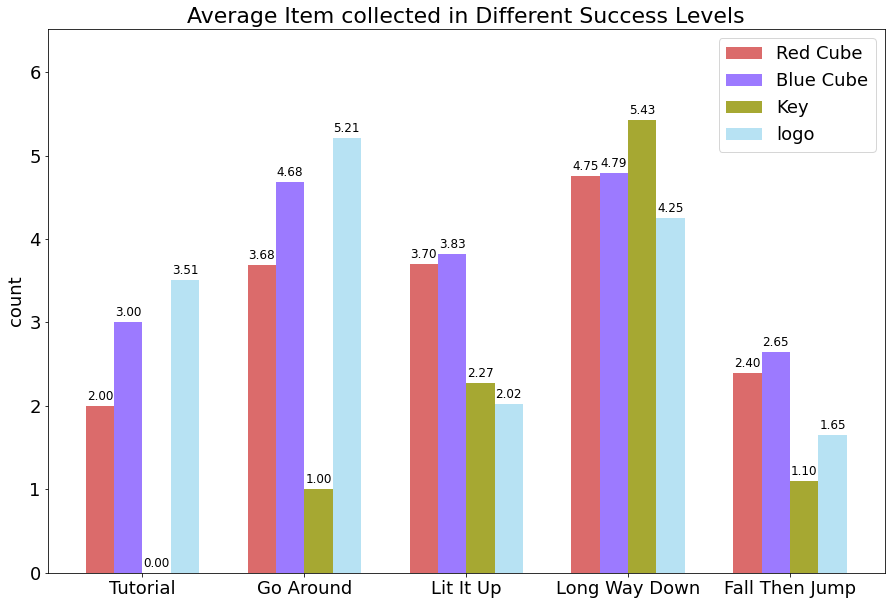

In [18]:
game_stat_painter(level_labels, ['Red Cube', 'Blue Cube', 'Key', 'logo'], 
                  succ_item_count, 'Average Item collected in Different Success Levels', 'count', sub_color=['#db6b6b', '#9c7aff', '#a6a832', '#b7e2f3'], label_format='%.2f')

## Game Play Stat

In [19]:
#Statistics format: #level:[ #Start Count, #Death Count, #Quit Count, #Success Count ]
statistics = []

for i in range(len(sorted_data)):
    succ_count = len(sorted_data[i][0])
    died_count = len(sorted_data[i][1])
    quit_count = len(sorted_data[i][2])
    statistics.append([succ_count + died_count + quit_count, died_count, quit_count, succ_count])



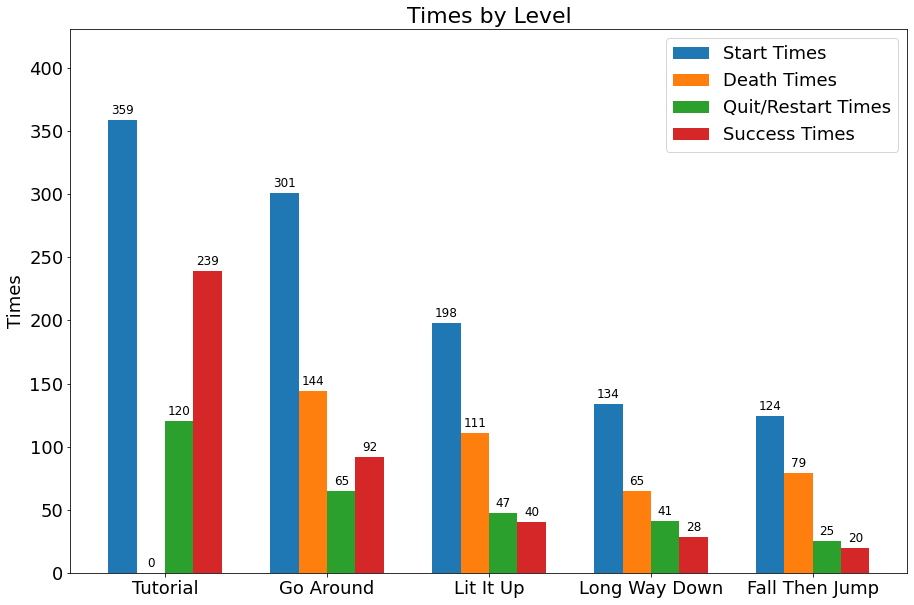

In [20]:
game_stat_painter(level_labels, ['Start Times', 'Death Times', 'Quit/Restart Times', 'Success Times'], 
                  statistics, 'Times by Level', 'Times')

## Check Point Stat

In [21]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []


for i in range(5):
    level_cp_stat.append([])

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            for check_pts in game_data[0]:
                if 'cp' in check_pts[0]:
                    cp_num = int(check_pts[0][-1])
                    lv_num = int(check_pts[0][2])
                    if len(level_cp_stat[lv_num]) < cp_num+1:
                        for i in range(cp_num - len(level_cp_stat[lv_num]) + 1):
                            level_cp_stat[lv_num].append(0)
                    level_cp_stat[lv_num][cp_num] += 1
                    
print(level_cp_stat)

[[], [], [35, 34, 59, 24, 15, 17], [52, 100, 52, 39, 37, 46, 38, 6, 0, 41], [113, 73, 53, 30, 51, 31, 10, 7, 22]]


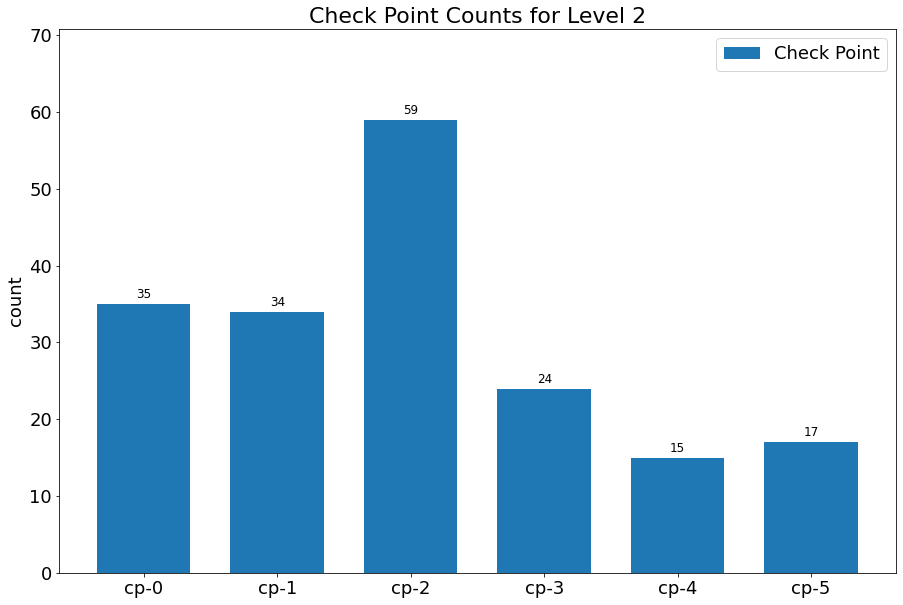

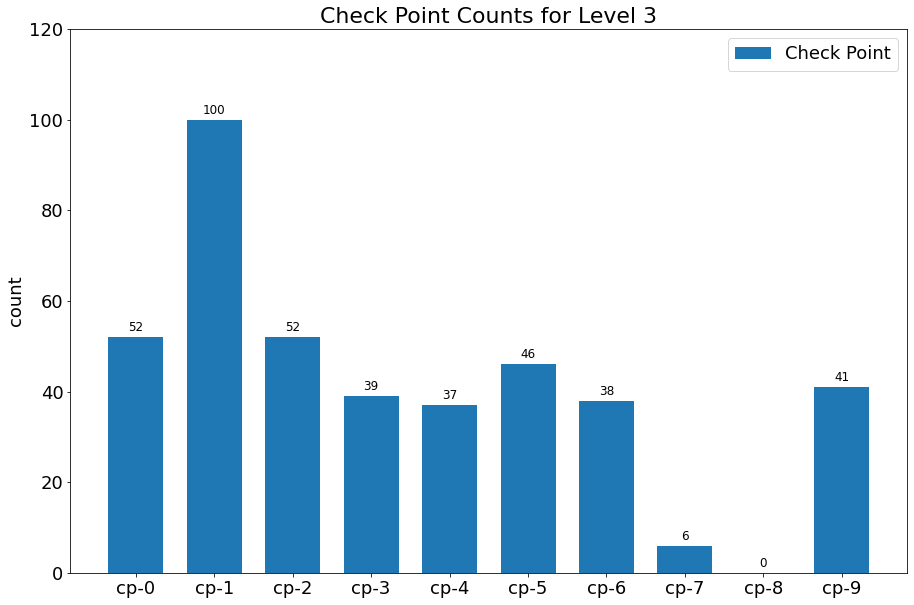

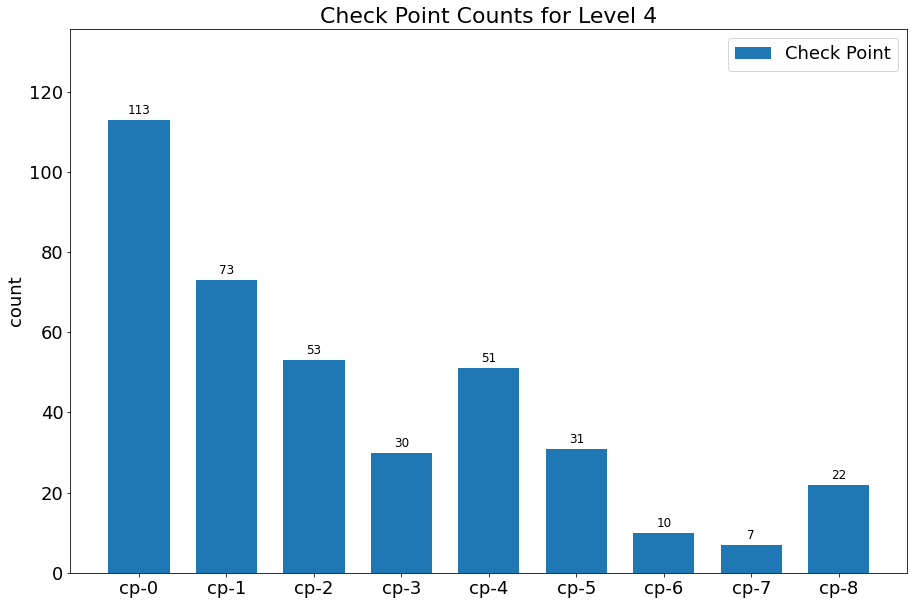

In [22]:
for i in range(2,5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in level_cp_stat[i]], 'Check Point Counts for Level ' + str(i), 'count')

In [23]:
avg_level_cp_stat = []
for i in range(len(level_cp_stat)):
    avg_count = []
    for cp_count in level_cp_stat[i]:
        avg_count.append(cp_count / statistics[i][0])
    avg_level_cp_stat.append(avg_count)
print(avg_level_cp_stat)

[[], [], [0.17676767676767677, 0.1717171717171717, 0.29797979797979796, 0.12121212121212122, 0.07575757575757576, 0.08585858585858586], [0.3880597014925373, 0.746268656716418, 0.3880597014925373, 0.291044776119403, 0.27611940298507465, 0.34328358208955223, 0.2835820895522388, 0.04477611940298507, 0.0, 0.30597014925373134], [0.9112903225806451, 0.5887096774193549, 0.4274193548387097, 0.24193548387096775, 0.4112903225806452, 0.25, 0.08064516129032258, 0.056451612903225805, 0.1774193548387097]]


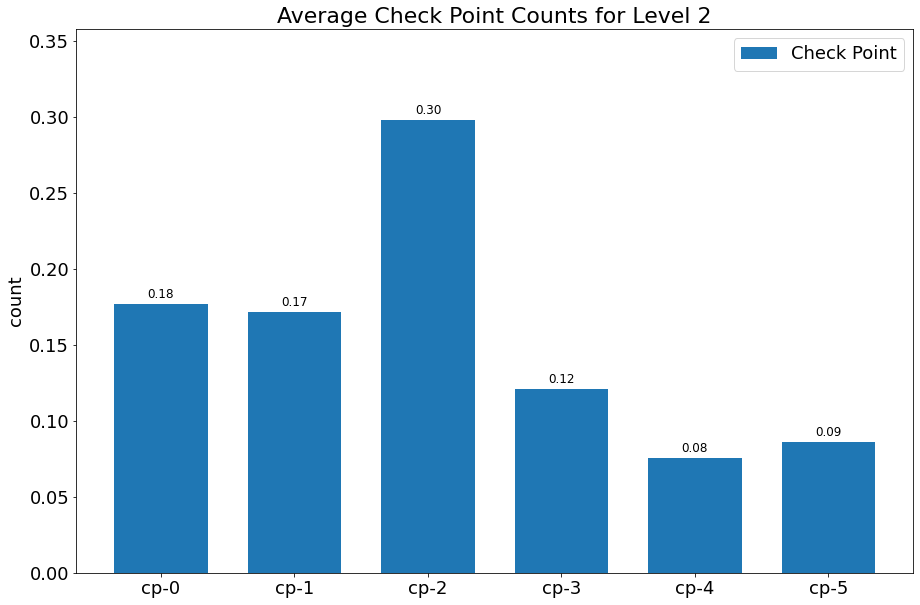

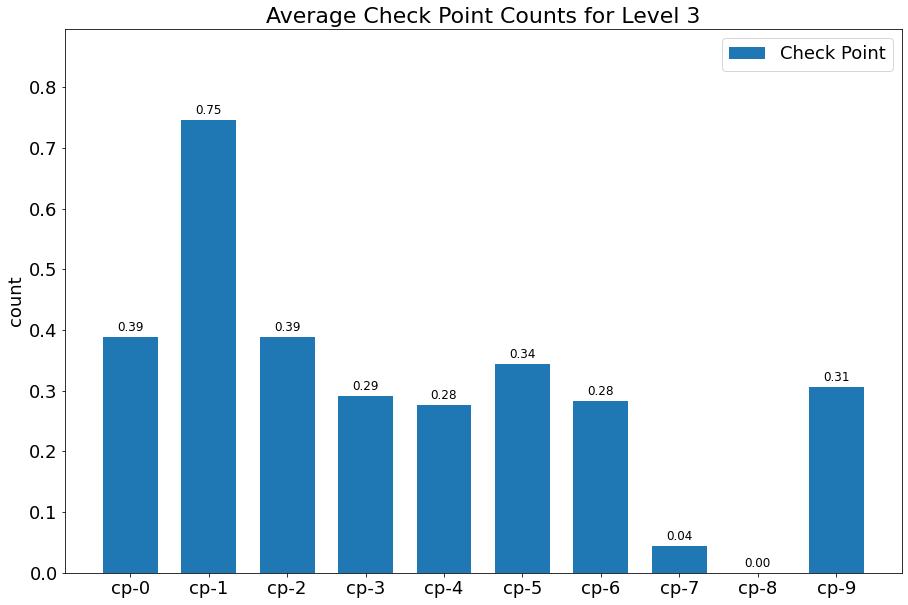

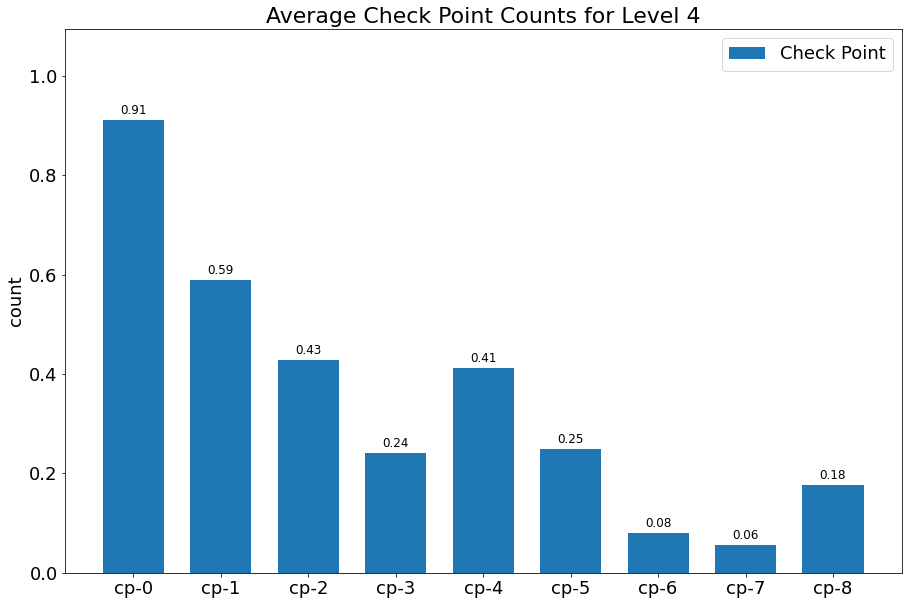

In [24]:
for i in range(2,5):
    game_stat_painter(['cp-'+str(i) for i in range(len(level_cp_stat[i]))], ['Check Point'], 
                      [[count] for count in avg_level_cp_stat[i]], 'Average Check Point Counts for Level ' + str(i), 'count', label_format='%.2f')

## Period Stat

In [25]:
#level_cp_stat format: #level:[ #cp1_count, .... ] cp format lv#-cp-#
level_cp_stat = []
movement_dict = []


for i in range(5):
    movement_dict.append({})

for i in range(len(sorted_data)):
    for game_list in sorted_data[i]:
        for game_data in game_list:
            cp_start = None
            start_time = 0
            pause_start = 0
            pause_time = 0
            for check_pts in game_data[0]:
                if any((cp_str in check_pts[0]) for cp_str in ['cp', 'start', 'quit', 'success', 'death']):
                    if cp_start != None:
                        level_num = int(check_pts[0][2])
                        time_period = check_pts[1] - start_time - pause_time
                        if time_period < 0:
                            print('Start time = %d, pause time = %d'%(start_time,pause_time))
                            print('current cp is %s, last cp is %s'%(check_pts[0],cp_start))
                        pause_time = 0
                        movement_tuple = (cp_start, check_pts[0])
                        if movement_tuple in movement_dict[level_num]:
                            movement_dict[level_num][movement_tuple].append(time_period)
                        else:
                            movement_dict[level_num][movement_tuple] = [time_period]
                    cp_start = check_pts[0]
                    start_time = check_pts[1]
                elif 'pause' in check_pts[0] or 'setting' in check_pts[0]:
                    pause_start = check_pts[1]
                elif 'resume' in check_pts[0]:
                    pause_time += check_pts[1] - pause_start
                    pause_start = 0
#print(movement_dict)

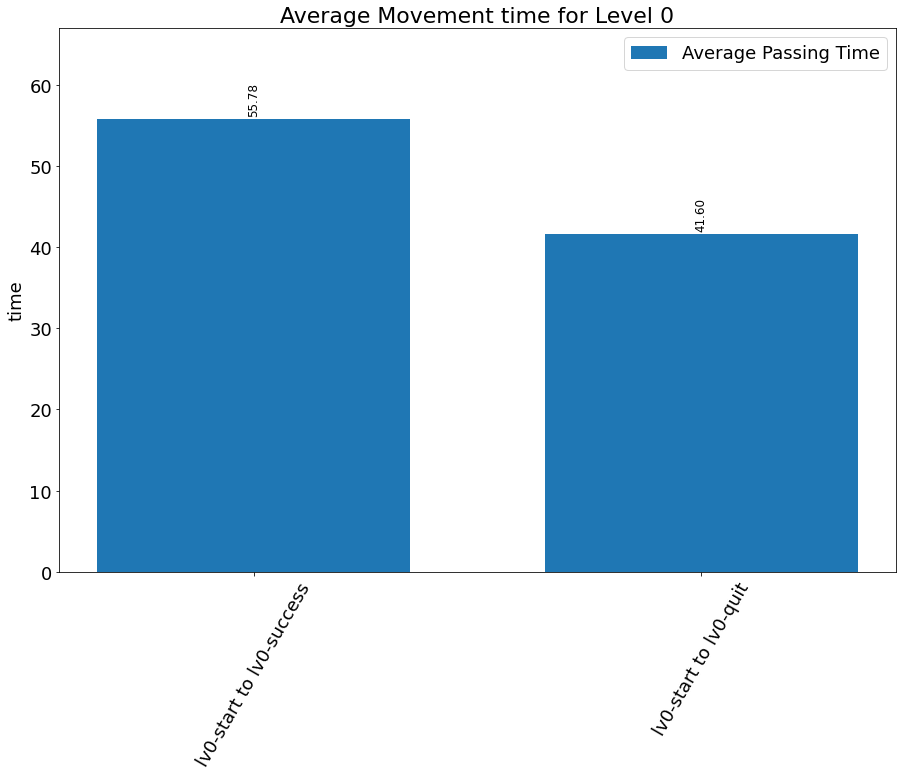

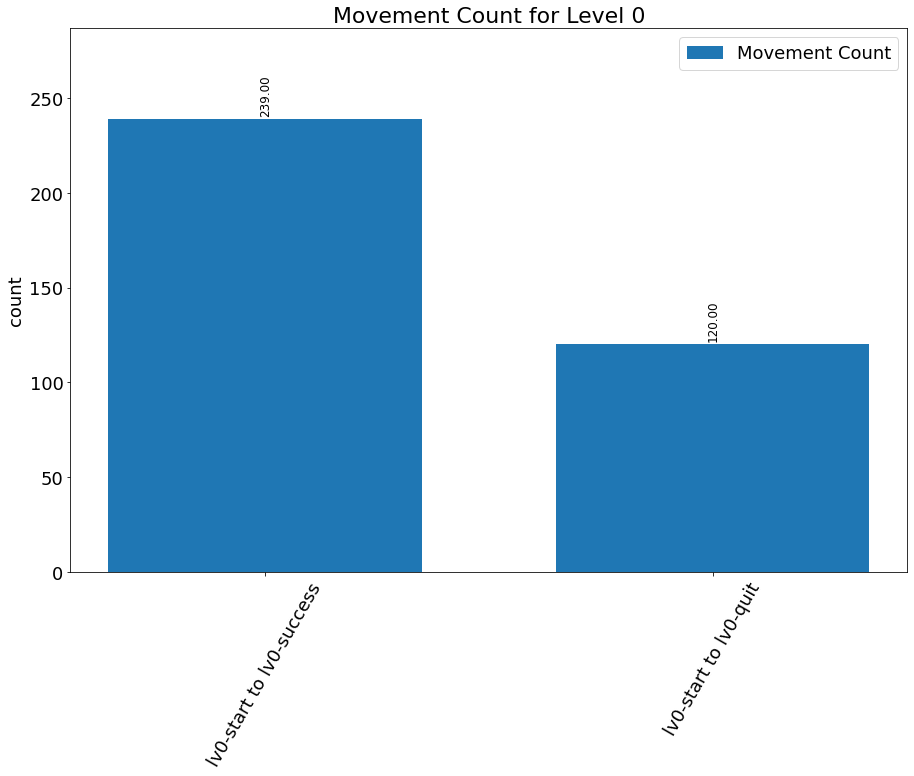

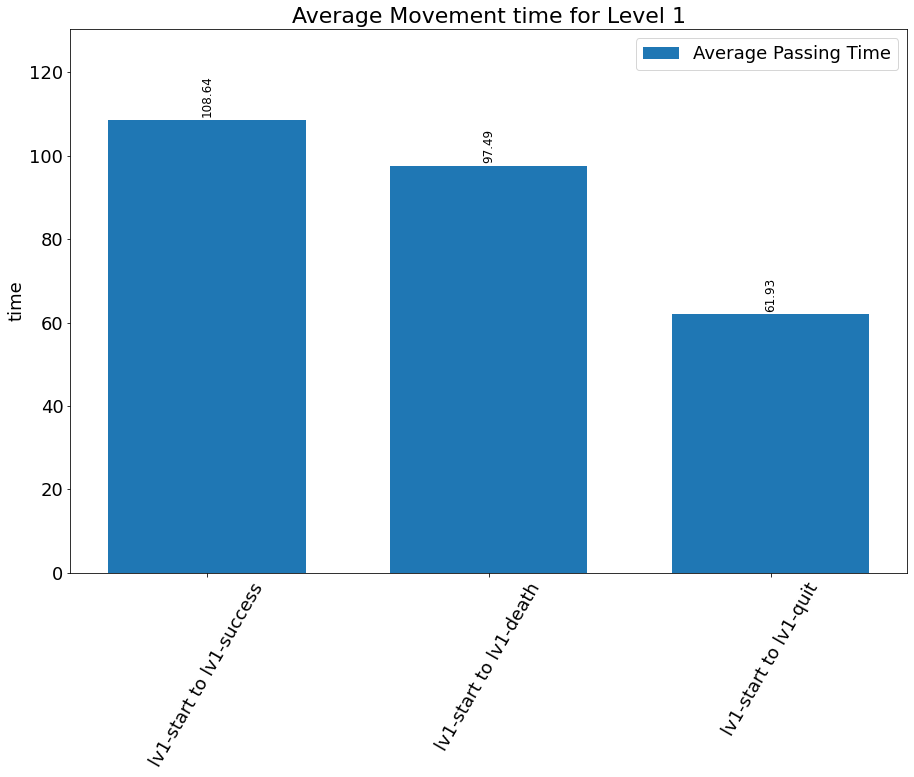

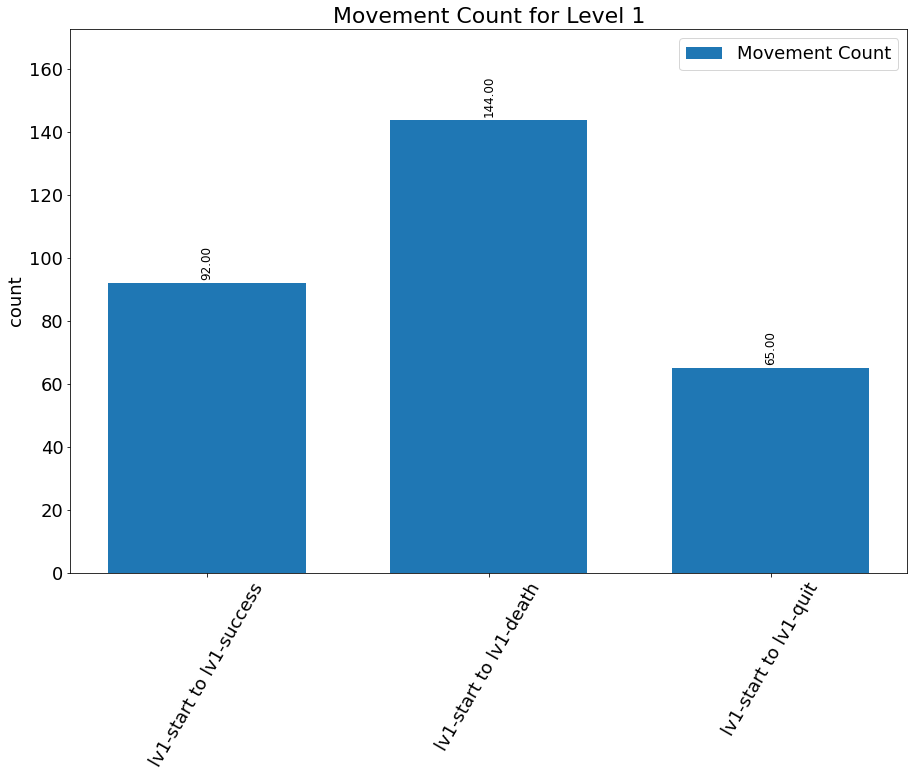

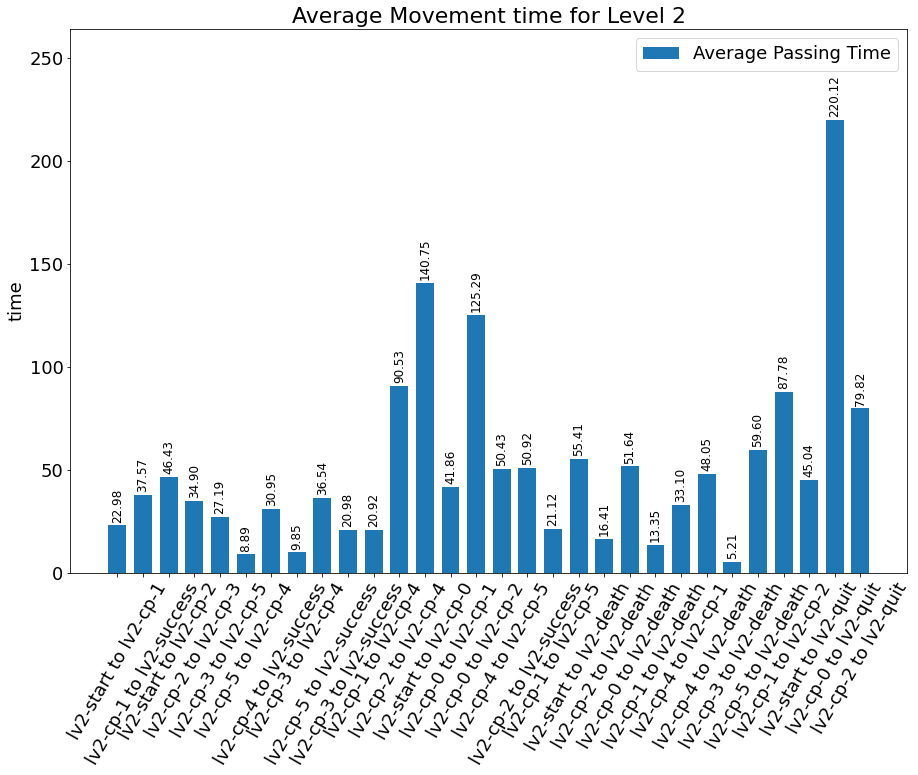

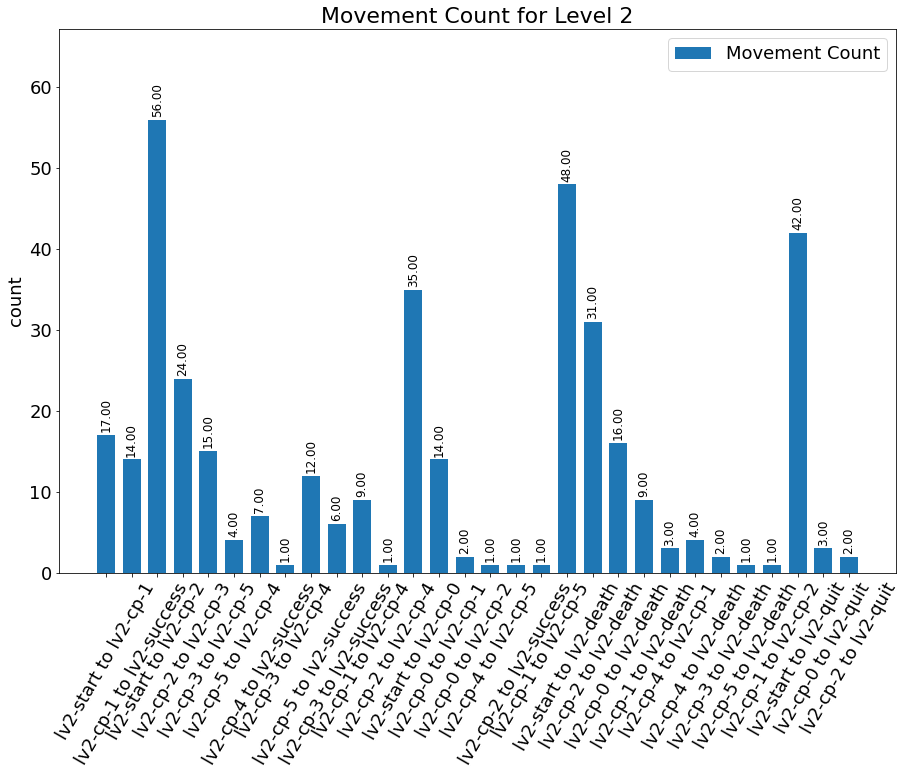

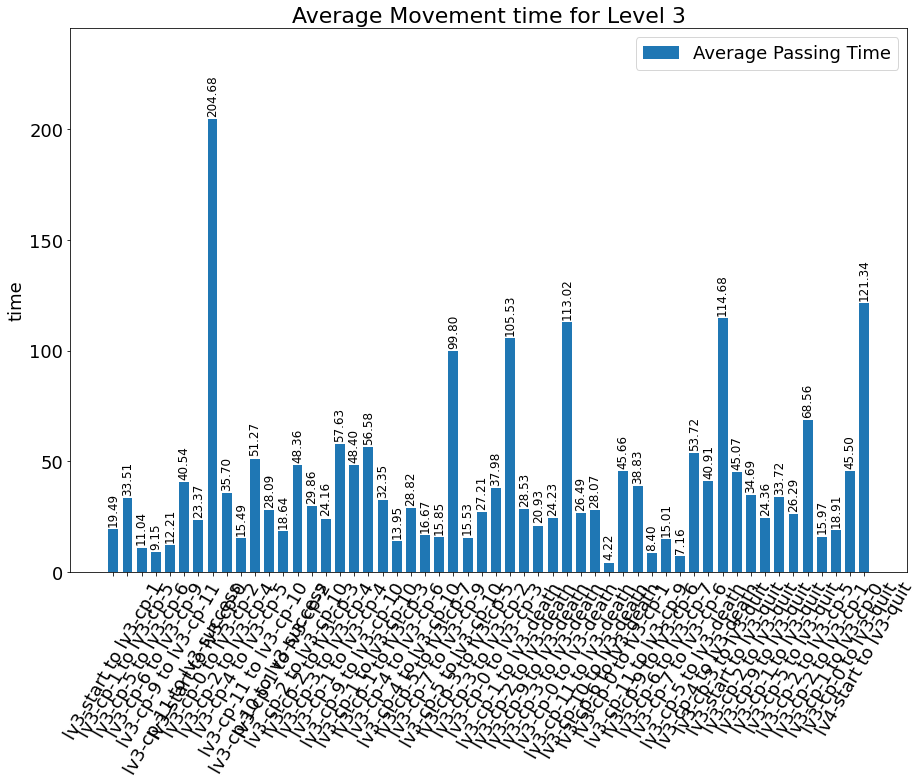

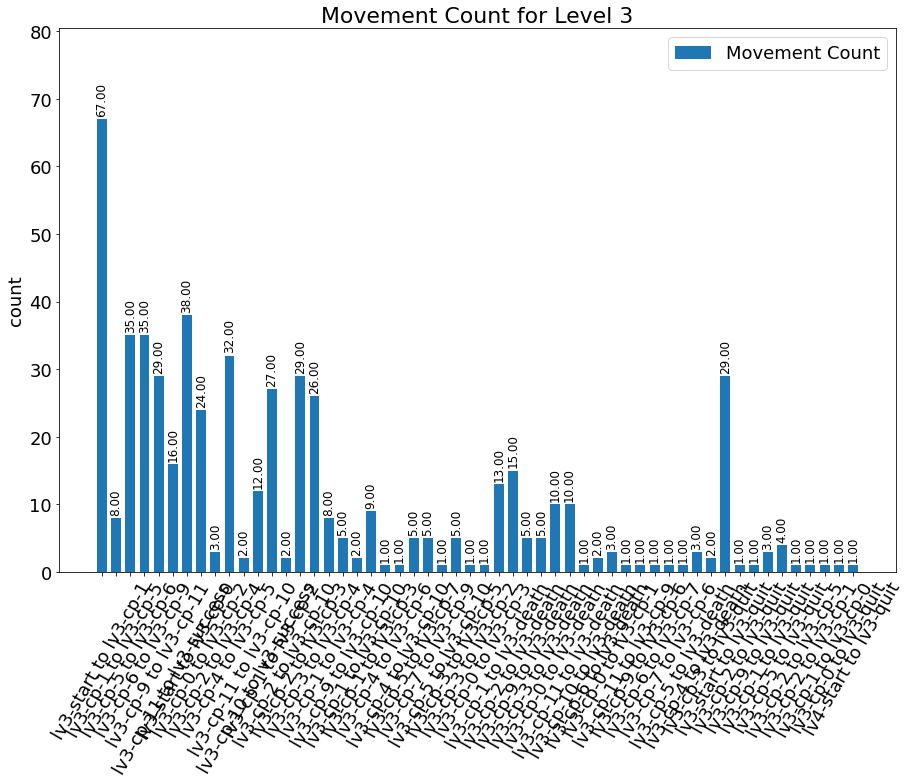

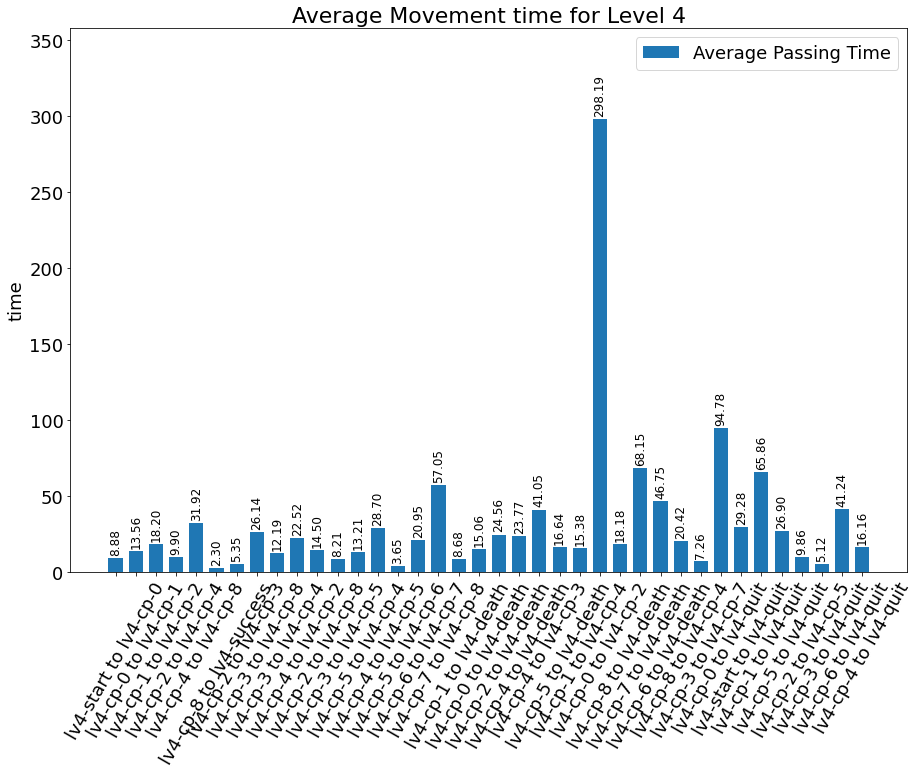

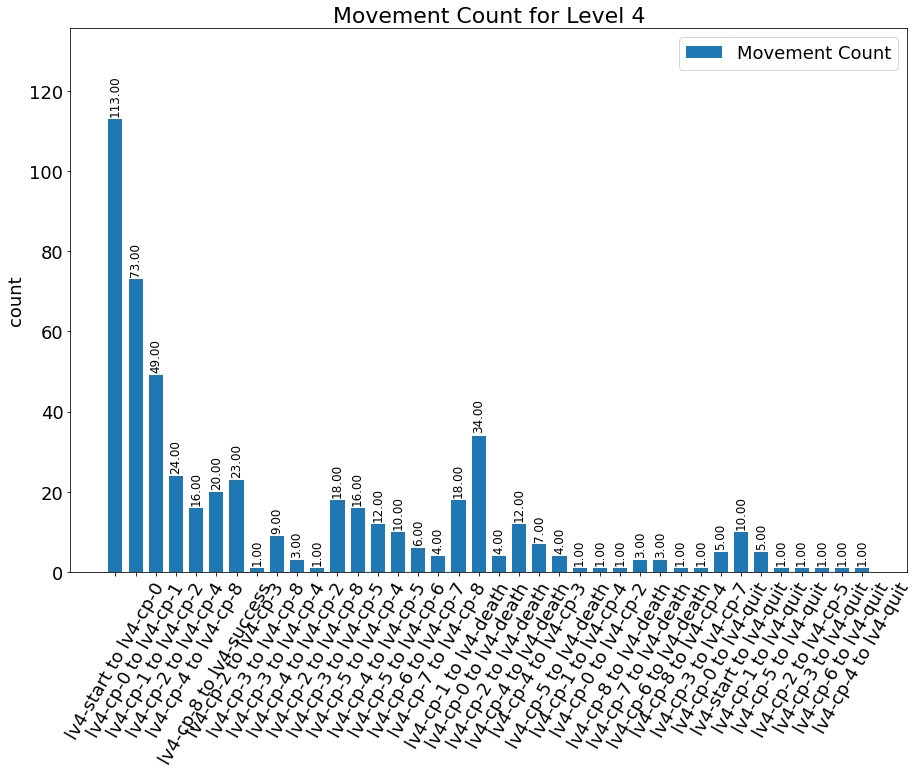

In [26]:
level_movement_label = []
level_movement_time_avg = []
level_movement_count = []


for i in range(5):
    level_movement_label.append([])
    level_movement_time_avg.append([])
    level_movement_count.append([])
    for movement, time_list in movement_dict[i].items():
        time_sum = 0
        for time in time_list:
            time_sum += time
        level_movement_label[i].append(movement[0] + ' to ' + movement[1])
        level_movement_time_avg[i].append(time_sum / len(time_list) / 10000)
        level_movement_count[i].append(len(time_list))

for i in range(5):
    game_stat_painter(level_movement_label[i], ['Average Passing Time'],
                      [[number] for number in level_movement_time_avg[i]], 'Average Movement time for Level ' + str(i), 'time', x_rotation= 60, label_format= '%.2f')
    game_stat_painter(level_movement_label[i], ['Movement Count'], 
                      [[number] for number in level_movement_count[i]], 'Movement Count for Level ' + str(i), 'count', x_rotation= 60, label_format= '%.2f')

In [93]:
selection_pie = []
for level in sorted_data:
    selection_pie.append(len(level[0])+len(level[1])+len(level[2]))
print(selection_pie)

[359, 301, 198, 134, 124]


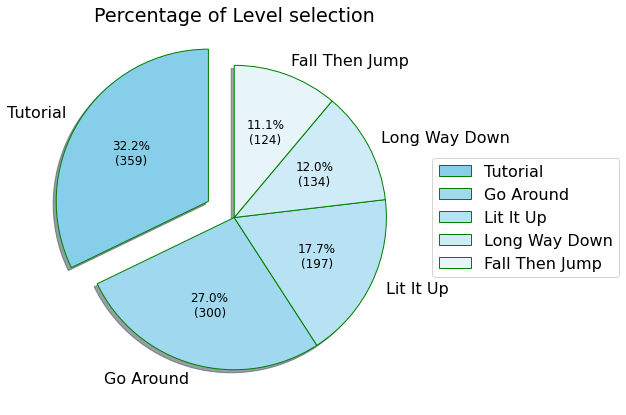

In [94]:
pie_plot(['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump'], 
         selection_pie, 'Percentage of Level selection', 
         explode = [0.2,0.0,0.0,0.0,0.0], 
         colors = ['#87ceeb', '#9fd8ef', '#b7e2f3', '#cfebf7', '#e7f5fb'])

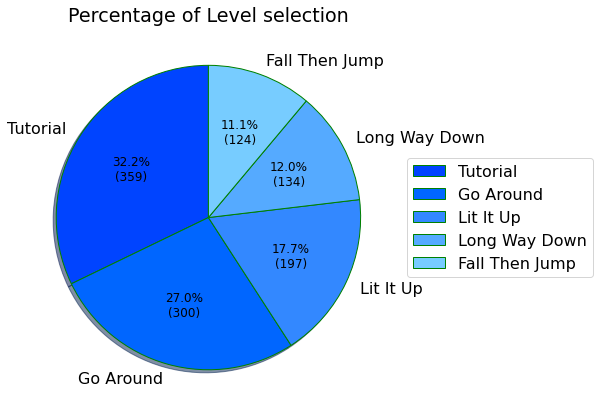

In [95]:
pie_plot(['Tutorial', 'Go Around', 'Lit It Up', 'Long Way Down', 'Fall Then Jump'], selection_pie, 'Percentage of Level selection', colors = ['#0044ff', '#0066ff', '#3388ff', '#55aaff', '#77ccff'])

In [96]:
#item_count format: #level:[ #red, #blue, #key ] cp format lv#-item-redcube
completion_count = []


for i in range(5):
    completion_count.append([])

for i in range(5):
    for game_play in sorted_data[i][0]:
        logo_count = 0
        for check_pts in game_play[0]:
            if 'logo' in check_pts[0]:
                logo_count += 1
        completion_count[i].append(logo_count)
                    
print(completion_count)

logo_max = [4,6,10,9,6]

completion_avg = []
for i in range(5):
    counter = 0
    comp_sum = 0
    for logo_num in completion_count[i]:
        comp_sum += logo_num/logo_max[i]
        counter += 1
    if counter == 0:
        comp_avg = 0
    else:
        comp_avg = comp_sum / counter
    completion_avg.append(comp_avg)
    
print(completion_avg)

[[4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 5, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 2, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 2, 4, 3, 3, 3, 4, 3, 5, 3, 4, 4, 2, 4, 3, 1, 4, 2, 3, 4, 3, 2, 3, 2, 2, 3, 4, 4, 2, 3, 3, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 5, 3, 4, 3, 4, 4, 4, 1, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 5, 4, 3, 3, 4, 3, 4, 5, 4, 4, 2, 2, 3, 3, 4, 4, 3, 4, 2, 3, 2, 2, 4, 3, 3, 5, 2, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 5, 3, 3, 2, 3, 5, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 5, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 2, 2], [6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 5, 3, 4, 5, 4, 5, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 2, 5, 4, 5, 4, 4, 6, 6, 2, 5, 5, 5, 6, 6, 5, 5, 2, 6, 6, 6, 5, 6, 4, 6, 4, 6, 6, 5, 5, 5, 6, 5, 5, 2, 6, 6, 6, 6, 5, 6, 5, 4, 4, 6, 5, 6, 5, 5, 4, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 4, 6, 5, 3, 5], [0

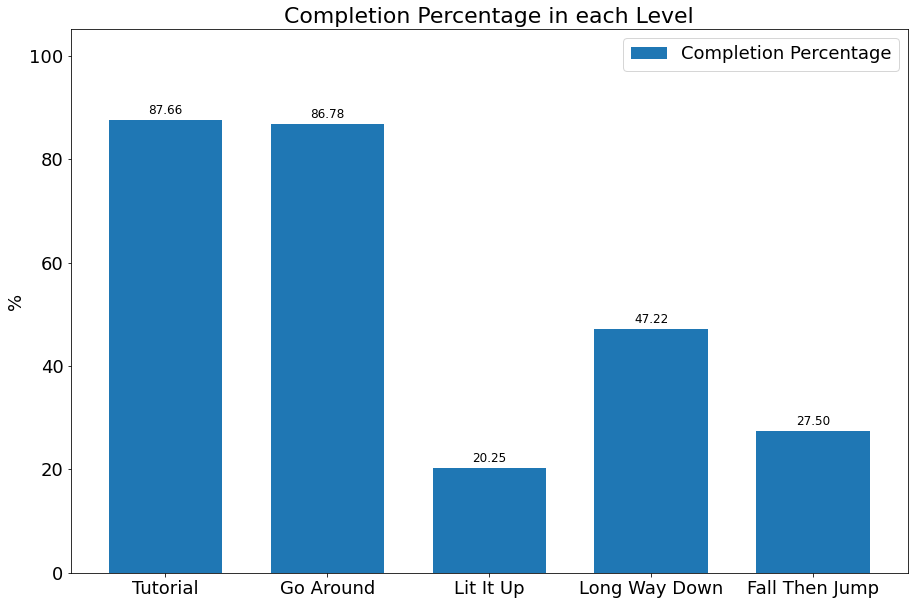

In [97]:
game_stat_painter(level_labels, ['Completion Percentage'], 
                      [[number*100] for number in completion_avg], 'Completion Percentage in each Level', '%', label_format= '%.2f')

[[133, 30, 27, 24, 32, 20],
 [35, 18, 4, 2, 5, 6],
 [4, 4, 0, 0, 0, 0],
 [3, 0, 1, 2, 0, 0],
 [9, 1, 2, 2, 2, 2],
 [4, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [9, 1, 2, 2, 2, 2],
 [61, 31, 11, 10, 7, 2],
 [25, 8, 2, 6, 2, 7],
 [1, 1, 0, 0, 0, 0],
 [6, 0, 0, 4, 0, 2],
 [2, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 1],
 [9, 5, 0, 0, 1, 3],
 [1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [52, 12, 10, 14, 6, 10],
 [6, 1, 1, 2, 1, 1],
 [1, 1, 0, 0, 0, 0],
 [16, 1, 1, 4, 4, 6],
 [0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0],
 [3, 2, 1, 0, 0, 0],
 [3, 2, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [17, 2, 2, 5, 1, 7],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [8, 1, 2, 2, 0, 3],
 [2, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [2, 1, 1, 0, 0, 0],
 [2, 0, 2, 0, 0, 0],
 [2, 2, 0, 0, 0, 0],
 [3, 1, 2, 0, 0, 0],
 [2, 1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0],
 [1, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [4, 1, 2, 0, 0, 1],
 [4, 1, 3, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [12, 3, 3, 4, 0, 2],
 [8, 1, 2, 3, 2, 0],
 [0, 0, 0, 0

[17, 16, 14, 13, 12, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
172
44


(array([69., 49., 13., 20.,  4., 10.,  3.,  1.,  1.,  2.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

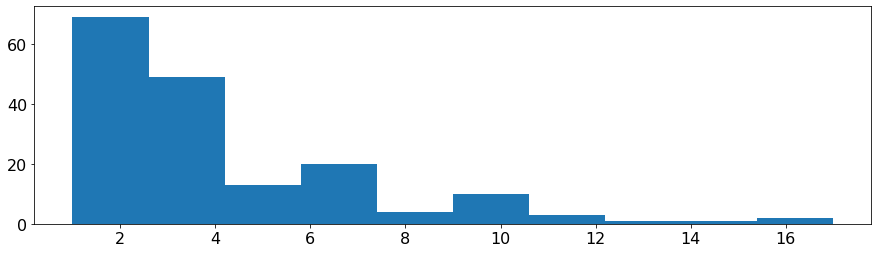

In [98]:
# Player_game_count format: [Player:[total, lv1, lv2, lv3, lv4, lv5]]
player_game_count = []
# Player_game_list format: [Player:[game:[cp:[Name, time]]]]
for player_data in player_game_list:
    lv_counter = [0,0,0,0,0,0]
    for game in player_data[1]:
        lv_counter[int(game[0][0][2])+1] += 1
        lv_counter[0] += 1
    player_game_count.append(lv_counter)

display(player_game_count)

player_total_count = [count[0] for count in player_game_count if count[0] != 0]
player_total_count.sort(reverse=True)
player_total_count = player_total_count[10:]
print(player_total_count)
print(len(player_total_count))
print(len(player_game_count) - len(player_total_count))
plt.hist(player_total_count)

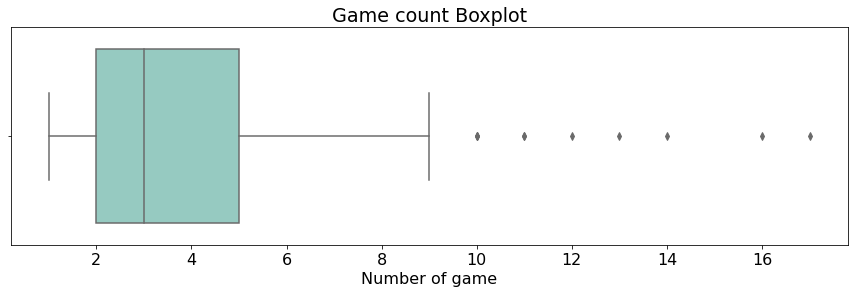

In [99]:
plt.rcParams.update({'font.size': 16, 'figure.figsize':[15, 4]})

sns.boxplot(x = player_total_count, orient="h", palette="Set3")
plt.title('Game count Boxplot')
plt.xlabel('Number of game')
plt.show()